In [1]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

import matplotlib

In [2]:
def convtime(x):
    x=x.removesuffix(':00+00:00')
    x=x.replace('T',' ')
    return x

In [3]:
signals=pd.read_csv('../1-input/5-signals-training.csv', sep=';')
print(signals.shape)
signals1=pd.read_csv('../1-input/5-signals-testing.csv', sep=';')
print(signals1.shape)
signals=signals.append(signals1)
print(signals.shape)
signals['Timestamp']=signals['Timestamp'].apply(convtime)
signals['Timestamp'] = pd.to_datetime(signals['Timestamp'])
signals['working']=signals.Grd_Prod_Pwr_Avg.apply(lambda x: 1 if x>50 else 0)
signals.loc[signals.working==1].shape, signals.shape
signals.reset_index(drop=True, inplace=True)
signals.head()


(434145, 83)
(87639, 83)


C:\Users\David MC\AppData\Local\Temp\ipykernel_13192\3030828519.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  signals=signals.append(signals1)


(521784, 83)


,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,working
0,T11,2016-01-01,1339.4,1233.3,1270.9,18.8,42.0,59,61,60,...,-752.6,-1000.0,56.5,973.4,1000.0,752.6,56.5,38,206.9,1
1,T06,2016-01-01,1270.0,1232.8,1248.5,6.8,42.0,51,52,53,...,0.0,-880.6,180.0,307.1,880.6,0.0,180.0,35,204.6,1
2,T01,2016-01-01,1277.4,1226.1,1249.0,9.0,41.0,58,59,58,...,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37,218.5,0
3,T09,2016-01-01,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,...,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0,1
4,T07,2016-01-01,1317.5,1229.5,1254.9,13.8,41.0,62,62,61,...,0.0,-1000.0,338.9,536.5,1000.0,0.0,338.9,39,197.3,1


In [4]:
fails=pd.read_csv('../1-input/3-failures.csv', sep=';')
fails['Timestamp']=fails['Timestamp'].apply(convtime)
fails['Timestamp'] = pd.to_datetime(fails['Timestamp'])

fails


,Turbine_ID,Component,Timestamp,Remarks
0,T01,GEARBOX,2016-07-18 02:10:00,Gearbox pump damaged
1,T06,GENERATOR,2016-07-11 19:48:00,Generator replaced
2,T06,GENERATOR,2016-07-24 17:01:00,Generator temperature sensor failure
3,T06,GENERATOR,2016-09-04 08:08:00,High temperature generator error
4,T06,GENERATOR,2016-10-27 16:26:00,Generator replaced
5,T06,GENERATOR,2016-10-02 17:08:00,Refrigeration system and temperature sensors i...
6,T06,HYDRAULIC_GROUP,2016-04-04 18:53:00,Error in pitch regulation
7,T07,GENERATOR_BEARING,2016-04-30 12:40:00,High temperature in generator bearing (replace...
8,T07,TRANSFORMER,2016-07-10 03:46:00,High temperature transformer
9,T07,TRANSFORMER,2016-08-23 02:21:00,High temperature transformer. Transformer refr...


In [5]:
fgen=fails.loc[fails.Component=='GENERATOR_BEARING']

fgen

,Turbine_ID,Component,Timestamp,Remarks
7,T07,GENERATOR_BEARING,2016-04-30 12:40:00,High temperature in generator bearing (replace...
11,T09,GENERATOR_BEARING,2016-06-07 16:59:00,High tempemperature generator bearing
12,T09,GENERATOR_BEARING,2016-08-22 18:25:00,High temperature generator bearing
13,T09,GENERATOR_BEARING,2016-10-17 09:19:00,Generator bearings replaced
19,T07,GENERATOR_BEARING,2017-08-20 06:08:00,Generator bearings damaged
24,T09,GENERATOR_BEARING,2017-01-25 12:55:00,Generator bearings replaced


In [6]:
signals=signals.loc[signals.working==1]
signals.reset_index(drop=True, inplace=True)
fgen.reset_index(drop=True, inplace=True)

In [7]:
signals['fase60']=0
signals['vid_util']=60*24*6


for j, moment in enumerate(signals.Timestamp):
    for i, event in enumerate(fgen.Timestamp):
        delta=  event-moment
        sep2=[3]
        sep=str(delta).split(' days')
        sep[0]=float(sep[0])
        sep[1]=sep[1].removeprefix(' +').removesuffix(':00').split(':')
        sep2[0]=sep[0]
        sep2.append(int(sep[1][0]))
        sep2.append(int(sep[1][1]))
        sep=sep2
        if sep[0]<60 and sep[0]>0 and fgen.Turbine_ID[i]==signals.Turbine_ID[j]:
            signals['fase60'][j]=1
            calc=sep[0]*(24*6)+sep[1]*6+sep[2]/10
            signals['vid_util'][j]=calc
        else: 
            continue
            
            


C:\Users\David MC\AppData\Local\Temp\ipykernel_13192\4077355795.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['fase60'][j]=1
C:\Users\David MC\AppData\Local\Temp\ipykernel_13192\4077355795.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['vid_util'][j]=calc


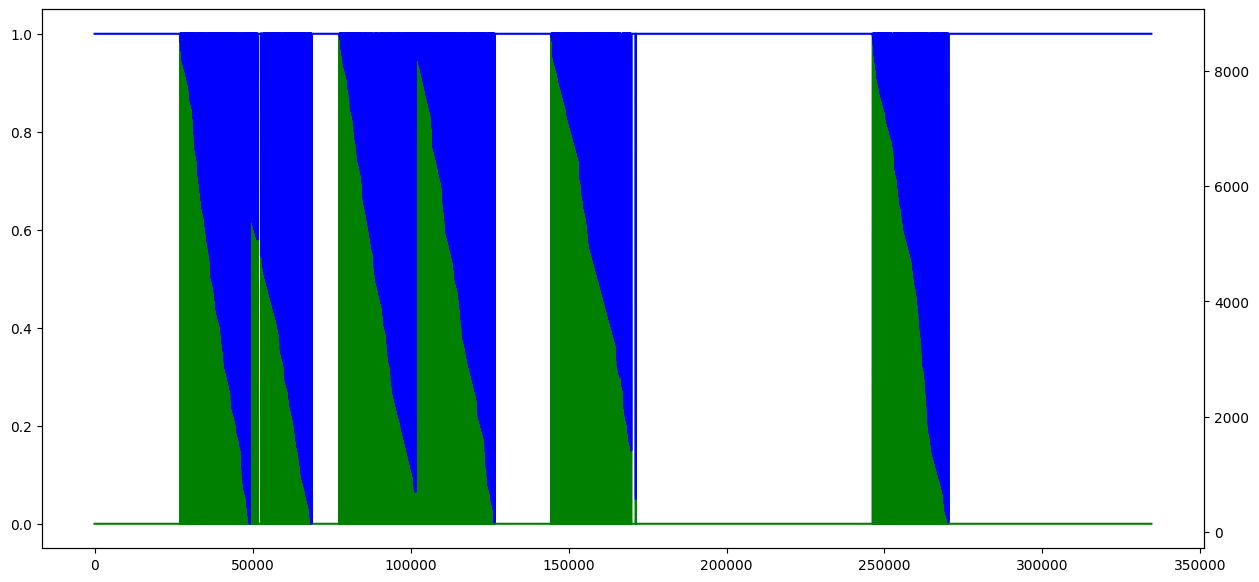

In [8]:
values1=signals['fase60']
values2=signals['vid_util']
fig, ax1 = plt.subplots(figsize=(15,7))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

In [9]:
signals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334467 entries, 0 to 334466
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Turbine_ID                   334467 non-null  object        
 1   Timestamp                    334467 non-null  datetime64[ns]
 2   Gen_RPM_Max                  334467 non-null  float64       
 3   Gen_RPM_Min                  334467 non-null  float64       
 4   Gen_RPM_Avg                  334467 non-null  float64       
 5   Gen_RPM_Std                  334467 non-null  float64       
 6   Gen_Bear_Temp_Avg            334462 non-null  float64       
 7   Gen_Phase1_Temp_Avg          334467 non-null  int64         
 8   Gen_Phase2_Temp_Avg          334467 non-null  int64         
 9   Gen_Phase3_Temp_Avg          334467 non-null  int64         
 10  Hyd_Oil_Temp_Avg             334467 non-null  int64         
 11  Gear_Oil_Temp_Avg         

In [10]:
signals.loc[signals['fase60']==1]

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,working,fase60,vid_util
27054,T07,2016-03-01 14:50:00,1655.0,1232.7,1439.4,138.7,28.0,41,41,39,...,23.0,995.7,1000.0,807.6,23.0,34,320.7,1,1,8627.0
27061,T07,2016-03-01 15:00:00,1649.9,1235.8,1412.9,132.6,33.0,48,47,46,...,27.7,993.0,1000.0,807.1,27.7,44,328.1,1,1,8626.0
27062,T07,2016-03-01 15:10:00,1654.2,1227.3,1447.4,129.0,35.0,52,51,50,...,68.7,981.7,1000.0,593.0,68.7,47,320.4,1,1,8625.0
27068,T07,2016-03-01 15:20:00,1655.0,1297.6,1469.5,91.7,37.0,55,54,53,...,0.6,1000.0,1000.0,974.5,0.6,49,328.8,1,1,8624.0
27076,T07,2016-03-01 15:30:00,1629.3,1224.7,1381.7,109.3,39.0,57,57,55,...,119.5,950.9,1000.0,447.2,119.5,51,329.8,1,1,8623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270175,T07,2017-08-19 01:10:00,1287.9,1232.6,1250.3,7.8,46.0,62,62,61,...,312.8,727.6,1000.0,0.0,312.8,54,88.6,1,1,173.8
270177,T07,2017-08-19 01:20:00,1262.4,1231.5,1249.5,5.1,47.0,63,63,63,...,276.3,659.3,1000.0,178.8,276.3,56,92.0,1,1,172.8
270181,T07,2017-08-19 01:30:00,1270.3,1236.9,1249.4,5.4,48.0,65,65,64,...,206.7,407.8,877.6,59.2,206.7,57,95.7,1,1,171.8
270188,T07,2017-08-19 01:40:00,1266.8,1236.7,1250.9,5.3,48.0,66,66,65,...,179.0,717.4,1000.0,407.1,179.0,58,96.1,1,1,170.8


In [11]:
listc=signals.columns
listc

Index(['Turbine_ID', 'Timestamp', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg',
       'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg',
       'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg',
       'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Max',
       'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std',
       'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg',
       'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1',
       'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr',
       'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
       'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr',
       'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg',
       'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg',
       'Gen_SlipRing_Temp_Avg', 'Spin

In [12]:
'''plt.figure(figsize=(40, 40))

mask=np.triu(np.ones_like(signals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(signals.corr(),
           #mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});'''

"plt.figure(figsize=(40, 40))\n\nmask=np.triu(np.ones_like(signals.corr(), dtype=bool))\n\ncmap=sns.diverging_palette(0, 10, as_cmap=True)\n\nsns.heatmap(signals.corr(),\n           #mask=mask,\n          cmap=cmap,\n          center=0,\n          square=True,\n          annot=True,\n          linewidths=0.5,\n          cbar_kws={'shrink': 0.5});"

In [13]:
cor_matrix = signals.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop2=['working', 'Prod_LatestAvg_ActPwrGen2','Prod_LatestAvg_ReactPwrGen2']
to_drop+=to_drop2

C:\Users\David MC\AppData\Local\Temp\ipykernel_13192\234955373.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [14]:
signals.drop(to_drop, axis=1, inplace=True)
signals

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fase60,vid_util
0,T11,2016-01-01 00:00:00,1339.4,1233.3,1270.9,18.8,42.0,59,30,48,...,-973.4,-752.6,-1000.0,56.5,973.4,1000.0,38,206.9,0,8640.0
1,T06,2016-01-01 00:00:00,1270.0,1232.8,1248.5,6.8,42.0,51,30,43,...,-307.1,0.0,-880.6,180.0,307.1,880.6,35,204.6,0,8640.0
2,T09,2016-01-01 00:00:00,1376.7,1234.3,1272.0,24.7,40.0,58,44,43,...,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,33,214.0,0,8640.0
3,T07,2016-01-01 00:00:00,1317.5,1229.5,1254.9,13.8,41.0,62,32,45,...,-536.5,0.0,-1000.0,338.9,536.5,1000.0,39,197.3,0,8640.0
4,T09,2016-01-01 00:10:00,1485.0,1239.7,1321.4,50.4,40.0,58,44,43,...,-871.4,-293.3,-1000.0,227.4,871.4,1000.0,33,214.0,0,8640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334462,T11,2017-12-31 23:50:00,1320.5,1216.8,1262.0,20.6,42.0,56,28,50,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,37,331.5,0,8640.0
334463,T07,2017-12-31 23:50:00,1329.9,1193.0,1257.6,18.9,38.0,61,30,49,...,-966.0,-256.3,-1000.0,109.8,966.0,1000.0,32,334.8,0,8640.0
334464,T01,2017-12-31 23:50:00,1273.1,1239.8,1250.7,4.7,39.0,59,26,49,...,-983.9,-727.0,-1000.0,50.2,983.9,1000.0,38,347.8,0,8640.0
334465,T09,2017-12-31 23:50:00,1258.3,1239.7,1249.5,3.1,39.0,60,45,46,...,-955.8,-372.9,-1000.0,119.2,955.8,1000.0,32,339.7,0,8640.0


In [15]:
def turbine_name(x):
    equis=int(x.removeprefix('T'))       
    return equis

In [16]:
signals.Turbine_ID=signals.Turbine_ID.apply(lambda x: turbine_name(x))
signals=signals.dropna().reset_index(drop=True)

In [17]:
import random

list_ceros= signals.loc[(signals.fase60==0)].index
list_unos= signals.loc[(signals.fase60==1)].index
list_ceros_equal=random.choices(list(list_ceros), k=len(list_unos)*4)
list_analysis= list_ceros_equal + list(list_unos)
list_analysis.sort()
signals2=signals.iloc[list_analysis]
len(list_ceros_equal), len(list_ceros), len(list_unos), len(list_analysis)

(117724, 305031, 29431, 147155)

In [18]:
signals.iloc[list_unos].fase60

27054     1
27061     1
27062     1
27068     1
27076     1
         ..
270170    1
270172    1
270176    1
270183    1
270185    1
Name: fase60, Length: 29431, dtype: int64

In [19]:
signals2.head(10)

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fase60,vid_util
0,11,2016-01-01 00:00:00,1339.4,1233.3,1270.9,18.8,42.0,59,30,48,...,-973.4,-752.6,-1000.0,56.5,973.4,1000.0,38,206.9,0,8640.0
2,9,2016-01-01 00:00:00,1376.7,1234.3,1272.0,24.7,40.0,58,44,43,...,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,33,214.0,0,8640.0
3,7,2016-01-01 00:00:00,1317.5,1229.5,1254.9,13.8,41.0,62,32,45,...,-536.5,0.0,-1000.0,338.9,536.5,1000.0,39,197.3,0,8640.0
8,9,2016-01-01 00:20:00,1441.0,1274.6,1363.4,31.0,40.0,58,44,44,...,-999.7,-904.9,-1000.0,4.2,999.7,1000.0,33,214.0,0,8640.0
8,9,2016-01-01 00:20:00,1441.0,1274.6,1363.4,31.0,40.0,58,44,44,...,-999.7,-904.9,-1000.0,4.2,999.7,1000.0,33,214.0,0,8640.0
14,9,2016-01-01 00:30:00,1549.4,1266.5,1379.7,76.8,41.0,59,44,44,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,33,214.0,0,8640.0
14,9,2016-01-01 00:30:00,1549.4,1266.5,1379.7,76.8,41.0,59,44,44,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,33,214.0,0,8640.0
14,9,2016-01-01 00:30:00,1549.4,1266.5,1379.7,76.8,41.0,59,44,44,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,33,214.0,0,8640.0
16,7,2016-01-01 00:40:00,1366.1,1236.5,1288.2,32.8,42.0,63,32,46,...,-997.1,-908.9,-1000.0,13.6,997.1,1000.0,40,203.9,0,8640.0
17,1,2016-01-01 00:40:00,1320.9,1224.1,1257.7,18.0,40.0,57,30,44,...,-496.1,0.0,-1000.0,302.7,496.1,1000.0,36,222.4,0,8640.0


In [20]:
signals2.fase60.value_counts()

0    117724
1     29431
Name: fase60, dtype: int64

In [21]:
X=signals.drop(['fase60','vid_util','Timestamp','Turbine_ID', 'Grd_Prod_Freq_Avg', 'Grd_Prod_PsbleInd_Min', 'Grd_Prod_PsbleInd_Max', 'Grd_Prod_CosPhi_Avg', 'Prod_LatestAvg_ReactPwrGen0', 'Grd_Prod_PsbleInd_Std', 'Blds_PitchAngle_Max', 'Prod_LatestAvg_ActPwrGen0', 'Grd_Prod_ReactPwr_Max', 'Grd_Prod_ReactPwr_Std', 'Grd_Prod_PsbleCap_Max', 'Prod_LatestAvg_ReactPwrGen1', 'Grd_Prod_VoltPhse3_Avg', 'Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_Pwr_Std'], axis=1)[:275365]

y=signals.fase60[:275365]

X.shape, y.shape

((275365, 38), (275365,))

In [22]:
Xbus=signals.drop(['fase60','vid_util','Timestamp','Turbine_ID', 'Grd_Prod_Freq_Avg', 'Grd_Prod_PsbleInd_Min', 'Grd_Prod_PsbleInd_Max', 'Grd_Prod_CosPhi_Avg', 'Prod_LatestAvg_ReactPwrGen0', 'Grd_Prod_PsbleInd_Std', 'Blds_PitchAngle_Max', 'Prod_LatestAvg_ActPwrGen0', 'Grd_Prod_ReactPwr_Max', 'Grd_Prod_ReactPwr_Std', 'Grd_Prod_PsbleCap_Max', 'Prod_LatestAvg_ReactPwrGen1', 'Grd_Prod_VoltPhse3_Avg', 'Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_Pwr_Std'], axis=1)[275365:]
ybus=signals.fase60[275365:]

Xbus.shape, ybus.shape

((59097, 38), (59097,))

In [23]:
from sklearn.model_selection import train_test_split as tts

from sklearn.svm import SVR 
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGBC

from sklearn.metrics import balanced_accuracy_score as balacc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as rec
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acc

logreg=LogReg (max_iter=500)
rfc=RFC(n_estimators=500)
xgbc=XGBC()
svr=SVR()

from sklearn.preprocessing import RobustScaler


In [24]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((220292, 38), (55073, 38), (220292,), (55073,))

In [25]:
modelos=[ xgbc]

'''logreg, rfc,'''

modelos_name=[ 'xgbc']

''' 'LogReg', 'RFC','''

balacc_score=[]
prec_score=[]
rec_score=[]
f1_score=[]
acc_score=[]

for i,m in enumerate(modelos):

    m.fit(X_train, y_train)
    
    y_pred=m.predict(X_test)
    
    acc_score.append(acc(y_test, y_pred))
    prec_score.append(prec(y_test, y_pred))
    rec_score.append(rec(y_test, y_pred))
    f1_score.append(f1(y_test, y_pred))
    
    print(modelos_name[i])

analisis= pd.DataFrame({"modelos" : modelos_name, "acc_score" : acc_score, "prec_score" : prec_score, "rec_score" : rec_score, "f1_score" : f1_score})

analisis


xgbc


,modelos,acc_score,prec_score,rec_score,f1_score
0,xgbc,0.971638,0.894822,0.835157,0.863961


In [26]:
y_res=m.predict(Xbus)

modelos_name.append('resultado')
acc_score.append(acc(ybus, y_res))
prec_score.append(prec(ybus, y_res))
rec_score.append(rec(ybus, y_res))
f1_score.append(f1(ybus, y_res))

analisis= pd.DataFrame({"modelos" : modelos_name, "acc_score" : acc_score, "prec_score" : prec_score, "rec_score" : rec_score, "f1_score" : f1_score})
analisis

c:\Users\David MC\.conda\envs\Ironhack\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,modelos,acc_score,prec_score,rec_score,f1_score
0,xgbc,0.971638,0.894822,0.835157,0.863961
1,resultado,0.990456,0.000000,0.000000,0.000000


In [27]:
sigres=signals[275365:]

sigres['calculado']=y_res

sigresT6=sigres.loc[(sigres.Turbine_ID==6)]
sigresT9=sigres.loc[(sigres.Turbine_ID==9)]
sigresT11=sigres.loc[(sigres.Turbine_ID==11)]
sigresT1=sigres.loc[(sigres.Turbine_ID==1)]
sigresT7=sigres.loc[(sigres.Turbine_ID==7)]

C:\Users\David MC\AppData\Local\Temp\ipykernel_13192\519670577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigres['calculado']=y_res


C:\Users\David MC\AppData\Local\Temp\ipykernel_13192\1245427771.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT6['dano_acum']=signal


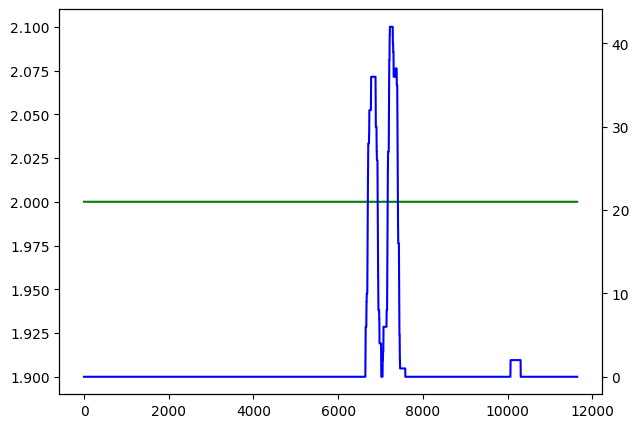

In [28]:
fase60=list(sigresT6['fase60'])
predic=list(sigresT6['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)
    
fase60_2=[item+2 for item in fase60]

sigresT6['dano_acum']=signal

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

C:\Users\David MC\AppData\Local\Temp\ipykernel_13192\2280315876.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT9['dano_acum']=signal


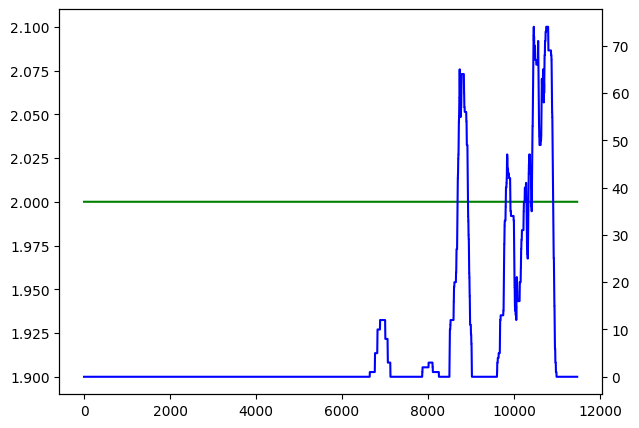

In [29]:
fase60=list(sigresT9['fase60'])
predic=list(sigresT9['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

sigresT9['dano_acum']=signal

In [38]:
danoT9= sigresT9.loc[sigresT9['dano_acum']>60].reset_index(drop=True)

danoT9

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fase60,vid_util,calculado,dano_acum
0,9,2017-12-01 15:50:00,1609.7,1218.8,1329.6,97.9,38.0,58,43,47,...,-1000.0,188.1,926.8,1000.0,32,308.3,0,8640.0,0,61
1,9,2017-12-01 16:00:00,1594.2,1230.9,1352.2,104.9,38.0,59,43,47,...,-1000.0,184.0,921.7,1000.0,32,306.1,0,8640.0,0,62
2,9,2017-12-01 16:10:00,1539.7,1223.5,1310.9,77.1,38.0,59,43,47,...,-1000.0,131.3,939.1,1000.0,32,304.1,0,8640.0,0,63
3,9,2017-12-01 16:20:00,1441.0,1220.3,1285.4,49.1,38.0,60,43,47,...,-1000.0,61.7,983.9,1000.0,32,294.3,0,8640.0,0,64
4,9,2017-12-01 16:30:00,1445.4,1211.8,1311.8,55.5,39.0,61,43,47,...,-1000.0,17.9,997.1,1000.0,32,296.9,0,8640.0,0,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,9,2017-12-25 17:50:00,1442.6,1300.0,1359.6,31.9,40.0,62,45,51,...,-1000.0,0.0,1000.0,1000.0,37,237.9,0,8640.0,0,65
425,9,2017-12-25 18:00:00,1486.0,1333.7,1401.2,34.4,40.0,62,45,51,...,-1000.0,0.0,1000.0,1000.0,37,244.2,0,8640.0,0,64
426,9,2017-12-25 18:10:00,1478.5,1248.9,1351.6,54.6,40.0,62,45,51,...,-1000.0,0.0,1000.0,1000.0,37,244.2,0,8640.0,0,63
427,9,2017-12-25 18:20:00,1662.3,1272.0,1403.6,85.2,40.0,62,45,51,...,-1000.0,0.0,1000.0,1000.0,37,255.0,0,8640.0,0,62


C:\Users\David MC\AppData\Local\Temp\ipykernel_13192\4009087320.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT11['dano_acum']=signal


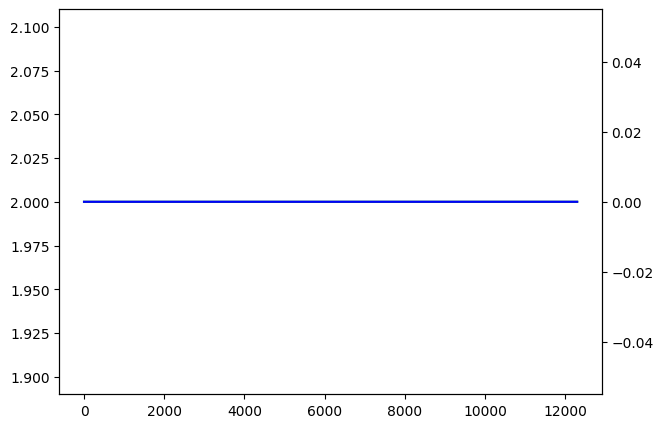

In [30]:
fase60=list(sigresT11['fase60'])
predic=list(sigresT11['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

sigresT11['dano_acum']=signal

C:\Users\David MC\AppData\Local\Temp\ipykernel_13192\1960030041.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT1['dano_acum']=signal


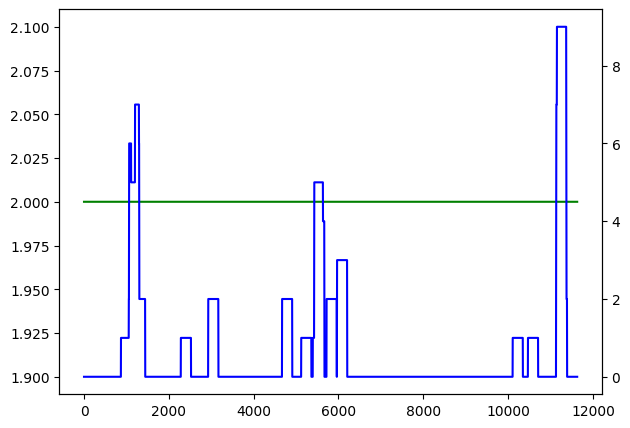

In [31]:
fase60=list(sigresT1['fase60'])
predic=list(sigresT1['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

sigresT1['dano_acum']=signal

C:\Users\David MC\AppData\Local\Temp\ipykernel_13192\346489614.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT7['dano_acum']=signal


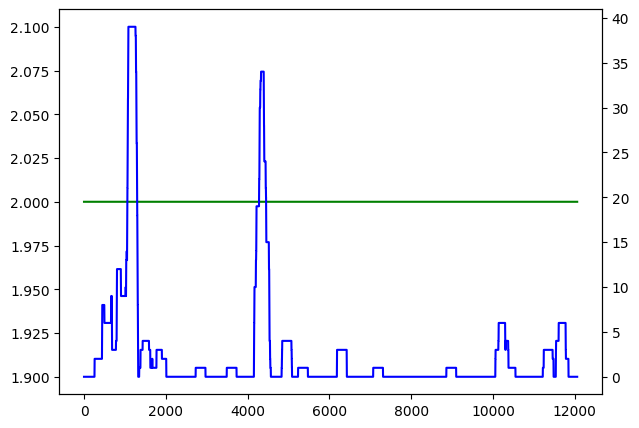

In [32]:
fase60=list(sigresT7['fase60'])
predic=list(sigresT7['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

sigresT7['dano_acum']=signal

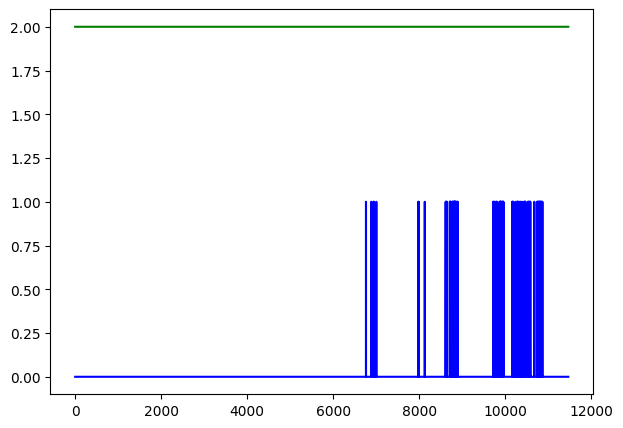

In [33]:
fase60=list(sigresT9['fase60'])
predic=list(sigresT9['calculado'])

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=predic
fig, ax1 = plt.subplots(figsize=(7,5))

#ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax1.plot(values2, 'b-')

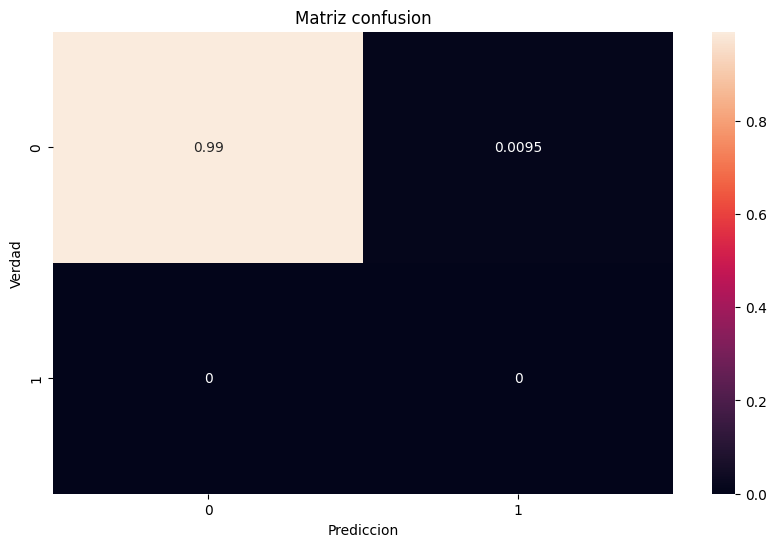

In [34]:
plt.figure(figsize=(10, 6))

ax=sns.heatmap(cm(ybus, y_res)/sum(sum(cm(ybus, y_res))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [35]:
erre=dict(zip(X.columns, xgbc.feature_importances_))

{k: v for k, v in sorted(erre.items(), key=lambda item: item[1])}

{'Amb_WindDir_Relative_Avg': 0.0027955032,
 'Blds_PitchAngle_Min': 0.0043919897,
 'Gen_RPM_Std': 0.004551771,
 'Blds_PitchAngle_Std': 0.004792546,
 'Blds_PitchAngle_Avg': 0.004984382,
 'Amb_WindSpeed_Avg': 0.00645129,
 'Grd_Prod_Pwr_Min': 0.006951804,
 'Gen_RPM_Min': 0.0075897323,
 'Gen_RPM_Max': 0.008963566,
 'Grd_Prod_ReactPwr_Min': 0.010770798,
 'Amb_WindSpeed_Std': 0.012138785,
 'Amb_WindSpeed_Max': 0.012628784,
 'Amb_WindDir_Abs_Avg': 0.016457213,
 'Grd_Prod_VoltPhse2_Avg': 0.01647777,
 'Amb_WindSpeed_Min': 0.017085198,
 'Gear_Oil_Temp_Avg': 0.019279813,
 'Cont_Hub_Temp_Avg': 0.020326732,
 'Grd_Prod_PsbleInd_Avg': 0.020397054,
 'Grd_Prod_PsbleCap_Avg': 0.02117187,
 'Gen_SlipRing_Temp_Avg': 0.0226202,
 'Amb_Temp_Avg': 0.023217905,
 'Grd_Prod_Pwr_Max': 0.023299757,
 'Gen_RPM_Avg': 0.025211204,
 'Cont_Top_Temp_Avg': 0.025292553,
 'Cont_VCP_WtrTemp_Avg': 0.02920957,
 'Grd_InverterPhase1_Temp_Avg': 0.029818133,
 'Nac_Direction_Avg': 0.030882189,
 'Nac_Temp_Avg': 0.03612327,
 'Grd_Busba

In [36]:
fgen=fails.loc[fails.Component=='GEARBOX']
fgen.Turbine_ID=fgen.Turbine_ID.apply(lambda x: turbine_name(x))
fgen

C:\Users\David MC\AppData\Local\Temp\ipykernel_13192\1023005062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fgen.Turbine_ID=fgen.Turbine_ID.apply(lambda x: turbine_name(x))


,Turbine_ID,Component,Timestamp,Remarks
0,1,GEARBOX,2016-07-18 02:10:00,Gearbox pump damaged
10,9,GEARBOX,2016-10-11 08:06:00,Gearbox repaired
17,6,GEARBOX,2017-10-17 08:38:00,Gearbox bearings damaged
23,9,GEARBOX,2017-10-18 08:32:00,Gearbox noise


In [37]:
danoT6= sigresT6.loc[sigresT6['dano_acum']>60].reset_index(drop=True)
delta=danoT6.Timestamp[0]-fgen.Timestamp.loc[fgen.Turbine_ID==6]
delta2=fgen.Timestamp.loc[fgen.Turbine_ID==6]- danoT6.Timestamp[0]

delta, delta2

KeyError: 0